# Análisis exploratorio de datos

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Agosto de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene un ejemplo inicial de análisis exploratorio de datos (EDA). Se utiliza el mismo set de datos usado en el ejemplo de análisis de varianza

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Descargar el archivo y guardarlo en el entorno
!wget https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/data/datos_anova_estudiantes.csv

--2025-08-16 21:51:33--  https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/data/datos_anova_estudiantes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13534 (13K) [text/plain]
Saving to: ‘datos_anova_estudiantes.csv’

datos_anova_estudia 100%[===================>]  13.22K  --.-KB/s    in 0.001s  

2025-08-16 21:51:33 (11.5 MB/s) - ‘datos_anova_estudiantes.csv’ saved [13534/13534]



# Contexto

Una asignatura probó tres métodos de enseñanza — *Tradicional*, *Flipped* y *Online*. Se midieron, para cada método, las horas de estudio y el **puntaje final** (0–100).

# Carga de datos

In [3]:
data = pd.read_csv("datos_anova_estudiantes.csv")

In [4]:
data.head()

,id,metodo,horas_estudio,sede,puntaje
0,T001,Tradicional,2.631496,Centro,82.147095
1,T002,Tradicional,4.297876,Norte,67.927349
2,T003,Tradicional,3.726383,Sur,86.268726
3,T004,Tradicional,2.294964,Norte,78.294437
4,T005,Tradicional,3.037120,Centro,69.911631


# Información general

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             240 non-null    object 
 1   metodo         240 non-null    object 
 2   horas_estudio  240 non-null    float64
 3   sede           240 non-null    object 
 4   puntaje        240 non-null    float64
dtypes: float64(2), object(3)
memory usage: 9.5+ KB


# Medidas estadísticas

In [24]:
data.describe().round(1)

,horas_estudio,puntaje
count,240.0,240.0
mean,3.5,77.5
std,0.9,8.8
min,0.9,55.9
25%,2.9,71.2
50%,3.5,77.6
75%,4.2,82.8
max,6.0,103.7


In [7]:
data.describe(include='all')

,id,metodo,horas_estudio,sede,puntaje
count,240,240,240.000000,240,240.000000
unique,240,3,NaN,3,NaN
top,T001,Tradicional,NaN,Centro,NaN
freq,1,80,NaN,125,NaN
mean,NaN,NaN,3.479496,NaN,77.541964
std,NaN,NaN,0.909432,NaN,8.761264
min,NaN,NaN,0.894850,NaN,55.903163
25%,NaN,NaN,2.850549,NaN,71.236366
50%,NaN,NaN,3.459554,NaN,77.599232
75%,NaN,NaN,4.195467,NaN,82.763160


In [8]:
data.describe(include="object").T

,count,unique,top,freq
id,240,240,T001,1
metodo,240,3,Tradicional,80
sede,240,3,Centro,125


# Distribución de variables numéricas

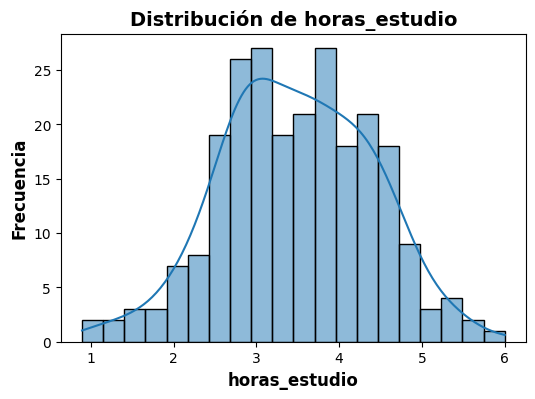

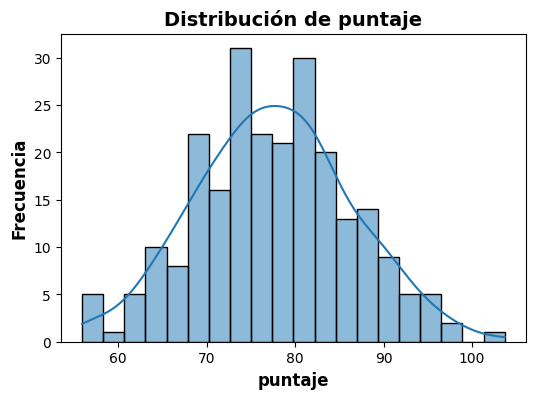

In [23]:
columnas_numericas = ["horas_estudio", "puntaje"]
for columna in columnas_numericas:
  plt.figure(figsize=(6,4))
  sns.histplot(data[columna], kde=True, bins=20)
  plt.title(f"Distribución de {columna}", fontsize=14, fontweight="bold")
  plt.xlabel(columna, fontsize=12, fontweight="bold")
  plt.ylabel("Frecuencia", fontsize=12, fontweight="bold")
  plt.show()

# Boxplots para ver dispersión y outliers

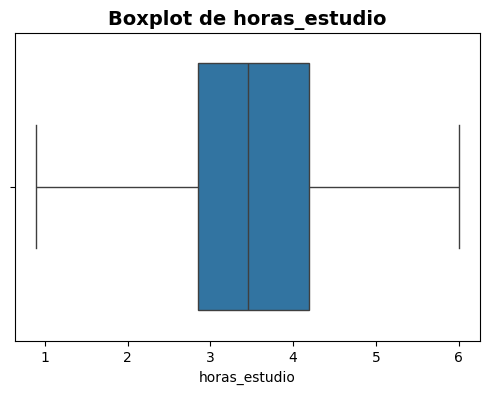

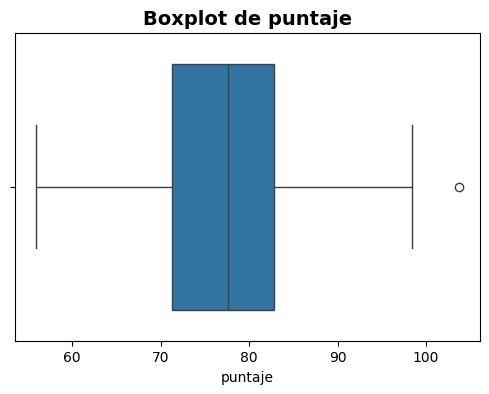

In [12]:
for columna in columnas_numericas:
  plt.figure(figsize=(6,4))
  sns.boxplot(x=data[columna])
  plt.title(f"Boxplot de {columna}", fontsize=14, fontweight="bold")
  plt.show()


# Comparaciones con variables categóricas

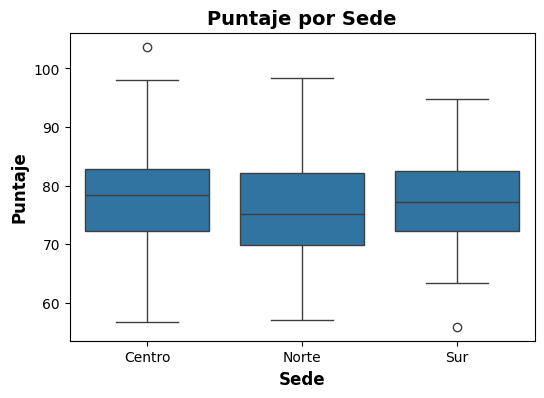

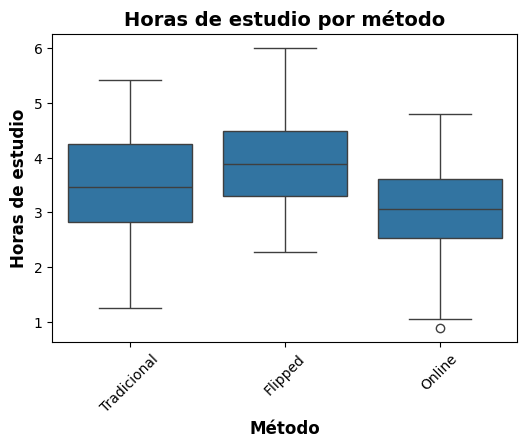

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sede", y="puntaje", data=data)
plt.title("Puntaje por Sede", fontsize=14, fontweight="bold")
plt.xlabel("Sede", fontsize=12, fontweight="bold")
plt.ylabel("Puntaje", fontsize=12, fontweight="bold")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="metodo", y="horas_estudio", data=data)
plt.title("Horas de estudio por método", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.xlabel("Método", fontsize=12, fontweight="bold")
plt.ylabel("Horas de estudio", fontsize=12, fontweight="bold")
plt.show()

# Correlaciones entre variables numéricas

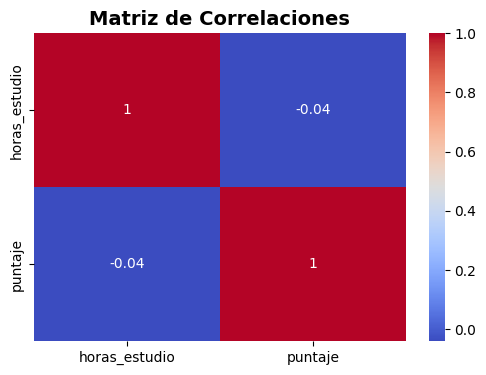

In [16]:
plt.figure(figsize=(6,4))
sns.heatmap(data[columnas_numericas].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlaciones", fontsize=14, fontweight="bold")
plt.show()

# Relación Horas de Estudio vs Puntaje

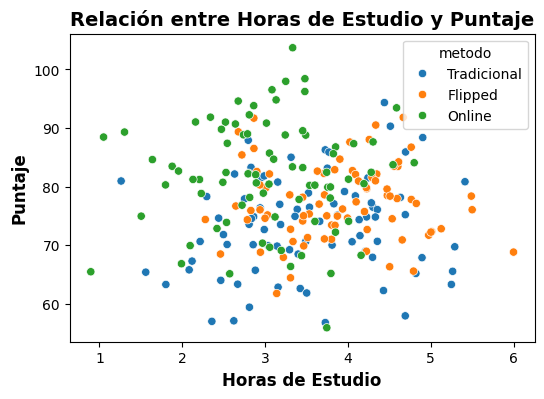

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="horas_estudio", y="puntaje", hue="metodo", data=data)
plt.title("Relación entre Horas de Estudio y Puntaje", fontsize=14, fontweight="bold")
plt.xlabel("Horas de Estudio", fontsize=12, fontweight="bold")
plt.ylabel("Puntaje", fontsize=12, fontweight="bold")
plt.show()